# Stellar Luminosity Modeling
## Part I – Linear Regression with One Feature

**Objective**: Model stellar luminosity (L) as a function of stellar mass (M)
using linear regression from first principles:

$$\hat{L} = w M + b$$

No machine learning libraries are used. All components (model, loss,
gradients, optimization) are implemented manually.

In [2]:
%pip install numpy matplotlib


  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)

   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- --------

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.3 MB 9.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/12.3 MB 9.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.3 MB 9.8 MB/s eta 0:00:01
   ----------------------- ---------------- 7.1/12.3 MB 8.9 MB/s eta 0:00:01
   ------------------------------ --------- 9.4/12.3 MB 9.3 MB/s eta 0:00:01
   ------------------------------------- -- 11.5/12.3 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 9.2 MB/s  0:00:01
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.7 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.7 MB 6.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.7 MB 7.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.7 MB 7.5 MB/s eta 0:00:01
   ----------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Main-sequence inspired stellar data

In [4]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])
n = len(M)

## Dataset Visualization

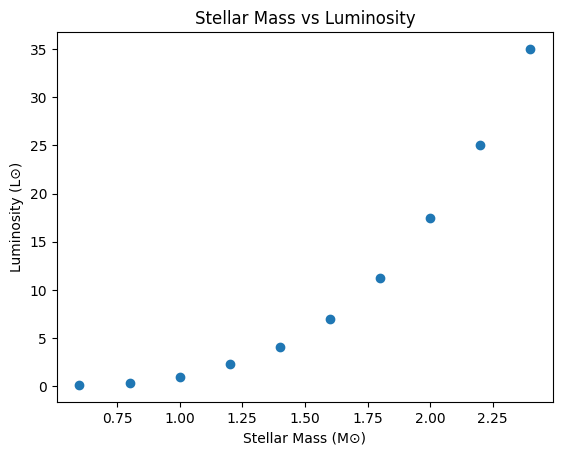

In [5]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.title("Stellar Mass vs Luminosity")
plt.show()

**Comment**: The relationship is clearly non-linear. Luminosity increases
rapidly with mass, suggesting a power-law behavior. A linear model will
approximate this trend but cannot fully capture the curvature.

## Model and Loss Function

In [6]:
def predict(M, w, b):
    return w * M + b

def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

## Cost Surface J(w, b)

In [ ]:
w_vals = np.linspace(0, 20, 50)
b_vals = np.linspace(-20, 20, 50)
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        L_hat = predict(M, W[j, i], B[j, i])
        J[j, i] = mse(L, L_hat)

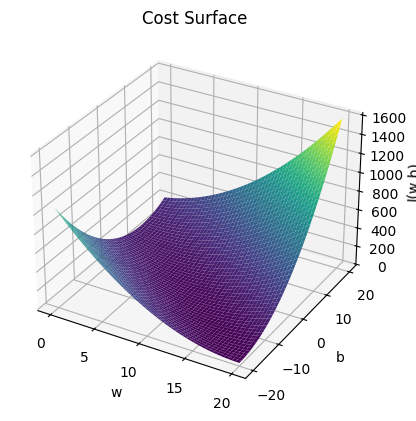

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')
plt.title("Cost Surface")
plt.show()

**Explanation**: The minimum of this surface corresponds to the optimal
parameters (w, b) that minimize prediction error.

## Gradients (Analytical)

In [9]:
def gradients_loop(M, L, w, b):
    dw = 0
    db = 0
    for i in range(len(M)):
        error = (w * M[i] + b) - L[i]
        dw += error * M[i]
        db += error
    dw *= 2 / len(M)
    db *= 2 / len(M)
    return dw, db

def gradients_vectorized(M, L, w, b):
    errors = (w * M + b) - L
    dw = 2 * np.mean(errors * M)
    db = 2 * np.mean(errors)
    return dw, db

## Gradient Descent Training

In [ ]:
def gradient_descent(M, L, lr, iterations, vectorized=True):
    w, b = 0.0, 0.0
    losses = []
    for _ in range(iterations):
        if vectorized:
            dw, db = gradients_vectorized(M, L, w, b)
        else:
            dw, db = gradients_loop(M, L, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse(L, predict(M, w, b)))
    return w, b, losses

## Learning Rate Experiments

In [11]:
learning_rates = [0.001, 0.01, 0.05]
results = {}

for lr in learning_rates:
    w, b, losses = gradient_descent(M, L, lr, 2000)
    results[lr] = (w, b, losses)
    print(f"lr={lr}: w={w:.3f}, b={b:.3f}, loss={losses[-1]:.3f}")

lr=0.001: w=9.716, b=-2.894, loss=44.696
lr=0.01: w=17.853, b=-16.376, loss=19.618
lr=0.05: w=18.130, b=-16.835, loss=19.590


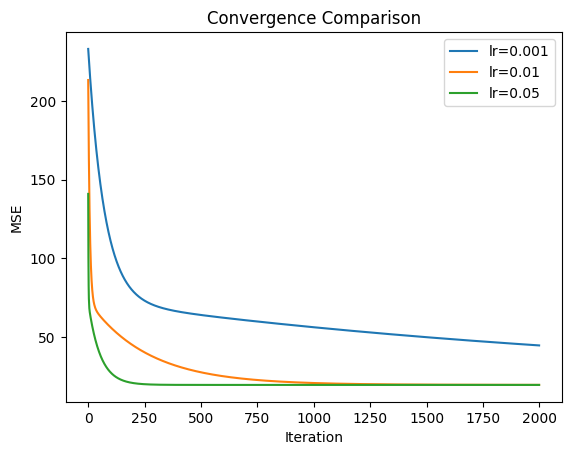

In [12]:
plt.figure()
for lr in learning_rates:
    plt.plot(results[lr][2], label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.title("Convergence Comparison")
plt.show()

**Comment**: Higher learning rates converge faster but may risk instability.
Moderate values offer a balance between speed and stability.

## Final Fit

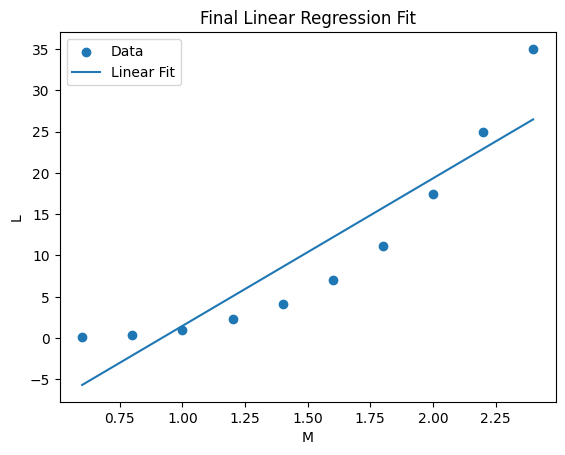

In [13]:
best_lr = 0.01
w, b, _ = results[best_lr]

plt.figure()
plt.scatter(M, L, label="Data")
plt.plot(M, predict(M, w, b), label="Linear Fit")
plt.xlabel("M")
plt.ylabel("L")
plt.legend()
plt.title("Final Linear Regression Fit")
plt.show()

## Conceptual Discussion
- **Astrophysical meaning of w**: average rate of luminosity increase per
unit stellar mass within this limited range.
- **Limitation**: Stellar luminosity follows a power-law relationship with
mass. Linear regression cannot capture curvature or rapid growth at higher
masses, motivating polynomial models.